# Analysis: What Drives the Price of a Car?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
file_path = 'vehicles.csv'
df = pd.read_csv(file_path)

# Data Cleaning
df_clean = df[(df['price'] > 100) & (df['price'] < 100000)]
df_clean = df_clean[(df_clean['year'] >= 1980) & (df_clean['year'] <= 2025)]
df_clean = df_clean[(df_clean['odometer'] > 0) & (df_clean['odometer'] < 500000)]

# Fill missing categorical values
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in categorical_columns:
    df_clean[col] = df_clean[col].fillna('Unknown')

# Data Summary
df_clean[['price', 'year', 'odometer']].describe()

,price,year,odometer
count,376631.000000,376631.000000,376631.000000
mean,18857.690495,2012.029844,93784.275150
std,14354.934827,6.386842,63944.321867
min,101.000000,1980.000000,1.000000
25%,7495.000000,2008.000000,39253.000000
50%,15550.000000,2013.000000,88602.000000
75%,27851.000000,2017.000000,136495.500000
max,99999.000000,2022.000000,499232.000000


## Data Visualization

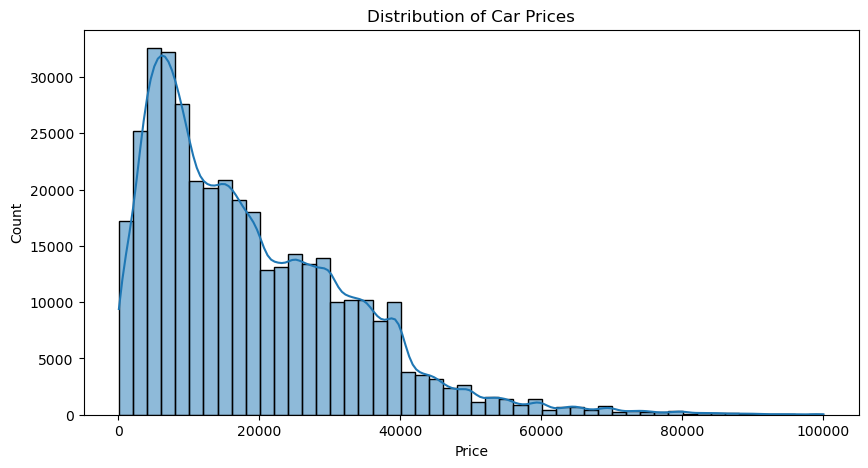

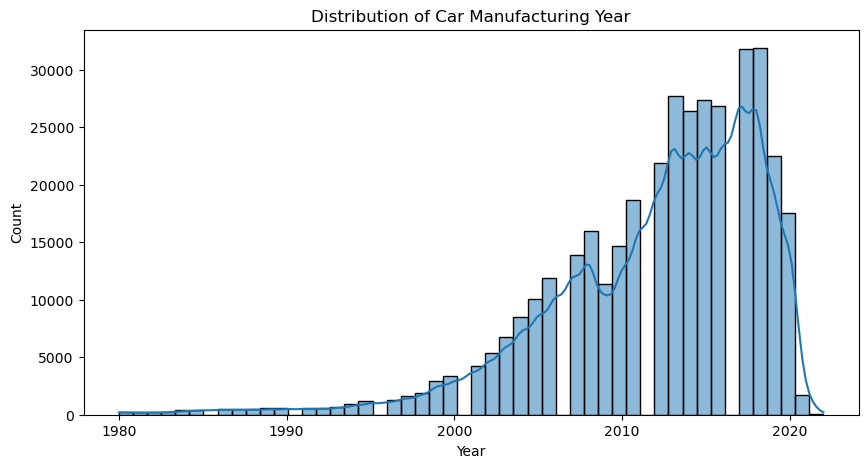

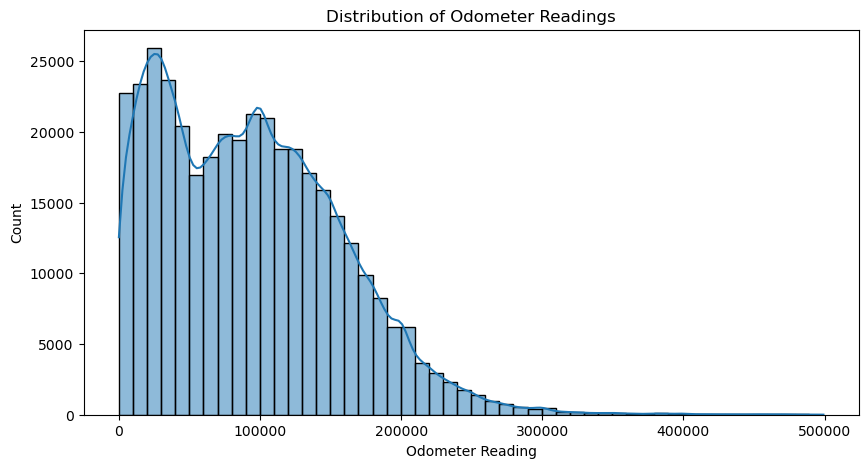

In [9]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

# Year Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_clean['year'], bins=50, kde=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Car Manufacturing Year')
plt.show()

# Odometer Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_clean['odometer'], bins=50, kde=True)
plt.xlabel('Odometer Reading')
plt.ylabel('Count')
plt.title('Distribution of Odometer Readings')
plt.show()

## Regression Model

In [10]:
# Feature Selection
num_features = ['year', 'odometer']
cat_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Encoding categorical features
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_cat = encoder.fit_transform(df_clean[cat_features])

# Scaling numerical features
scaler = StandardScaler()
scaled_num = scaler.fit_transform(df_clean[num_features])

# Combining processed features
X = np.hstack((scaled_num, encoded_cat))
y = df_clean['price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R² Score:', r2)

Mean Absolute Error: 7549.897180230477
Mean Squared Error: 109186686.31209433
Root Mean Squared Error: 10449.243336820822
R² Score: 0.47011382775597876
